### ruptures Python package for change point detection: simulated data

author: phebden

date: 15 May 2024

Ruptures: https://centre-borelli.github.io/ruptures-docs/

C. Truong, L. Oudre, N. Vayatis. Selective review of offline change point detection methods. Signal Processing, 167:107299, 2020.

In [8]:
#pip install ruptures

Text(0.5, 1.0, 'ftonsets: subject 1, trial 1')

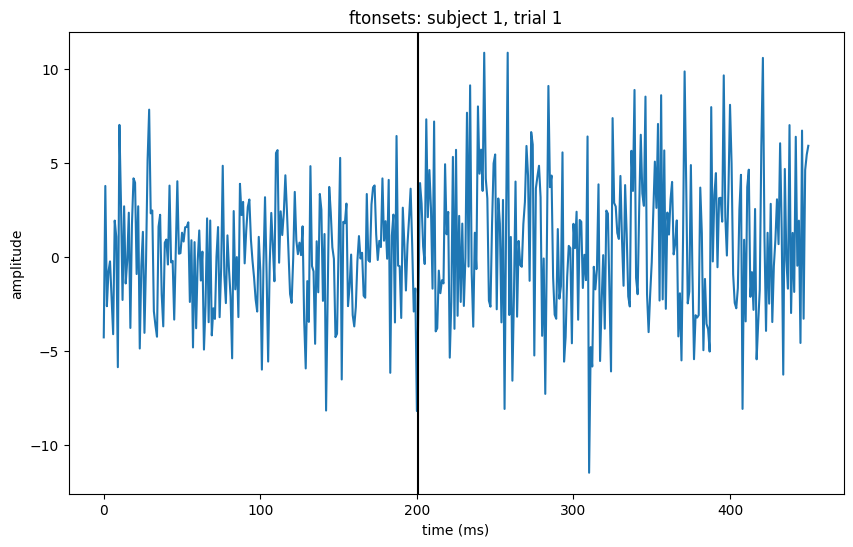

In [9]:
import matplotlib.pylab as plt
import ruptures as rpt
import h5py
import numpy as np

# PELT
# https://github.com/deepcharles/ruptures
# https://centre-borelli.github.io/ruptures-docs/user-guide/detection/pelt/

# see also https://schuetzgroup.github.io/sdt-python/changepoint.html

rng = np.random.default_rng(12345)
#print(rng)
#rfloat = rng.random()

# generate signal
mu, sigma = 0, 3 # mean and standard deviation
mu2, sigma2 = mu + 1, sigma + 1
n_bkps=1
true_onset=201
s1 = rng.normal(mu, sigma, true_onset-1)
s2 = rng.normal(mu2, sigma2, 251)
signal= np.array(list(s1) + list(s2))
times = np.arange(0, 451, 1).tolist()

plt.figure(figsize=(10, 6))
plt.plot(times, signal)
plt.axvline(x = true_onset, color = 'black', label = 'est. onset')
plt.xlabel("time (ms)")
plt.ylabel("amplitude")
plt.title("ftonsets: subject 1, trial 1")

200


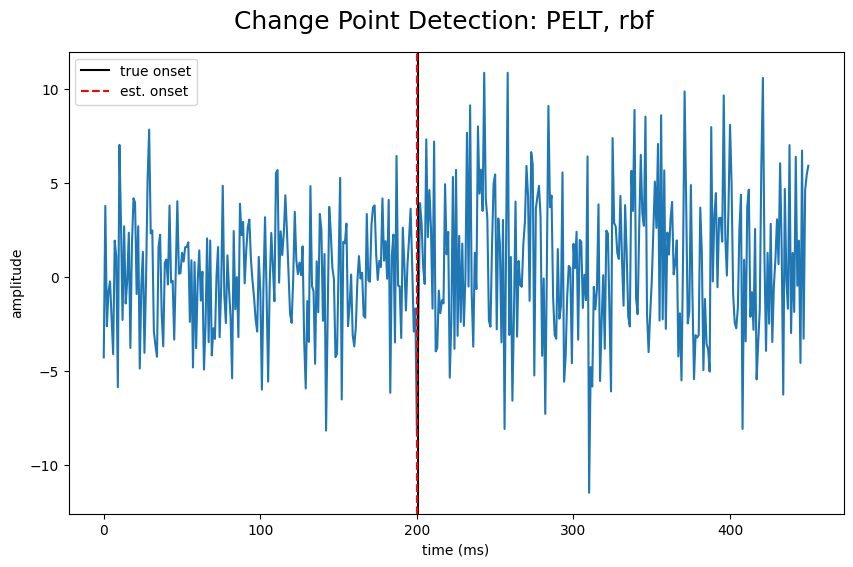

In [10]:
### Ruptures package ###
# PELT search method
model="rbf"
algo = rpt.Pelt(model=model).fit(signal)
result = algo.predict(pen=2)                # 1 --> early, 10 --> late
est_onset = result[0]
print(est_onset)

plt.figure(figsize=(10, 6))
plt.plot(times, signal)
plt.axvline(x = true_onset, color = 'black', linestyle='-', label = 'true onset')
plt.axvline(x = est_onset, color = 'red',  linestyle='--', label = 'est. onset')
plt.suptitle('Change Point Detection: PELT, rbf', y=.95, fontsize=18)
plt.xlabel("time (ms)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

170


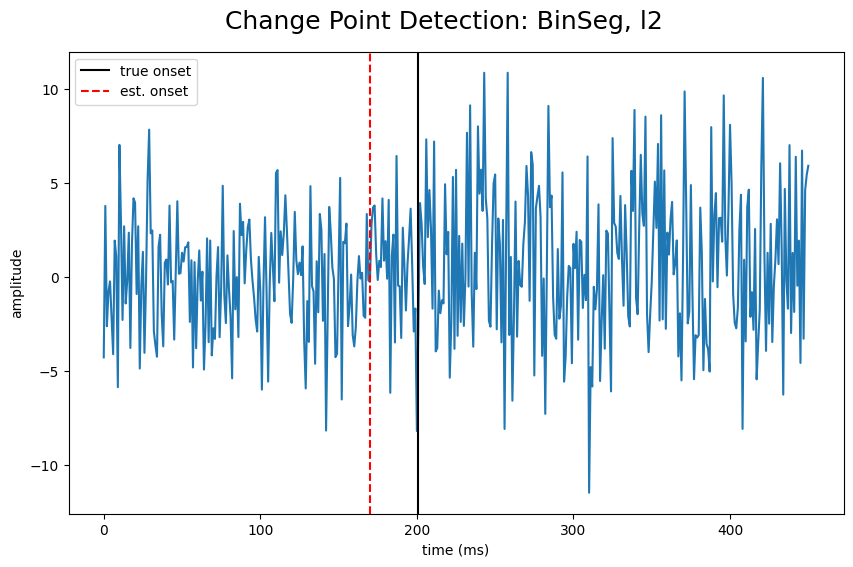

In [11]:
# Binary Segmentation search method
model = "l2"
algo = rpt.Binseg(model=model).fit(signal)
result = algo.predict(n_bkps=n_bkps)
est_onset = result[0]
print(est_onset)

plt.figure(figsize=(10, 6))
plt.plot(times, signal)
plt.axvline(x = true_onset, color = 'black', linestyle='-', label = 'true onset')
plt.axvline(x = est_onset, color = 'red',  linestyle='--', label = 'est. onset')
plt.suptitle('Change Point Detection: BinSeg, l2', y=.95, fontsize=18)
plt.xlabel("time (ms)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

325


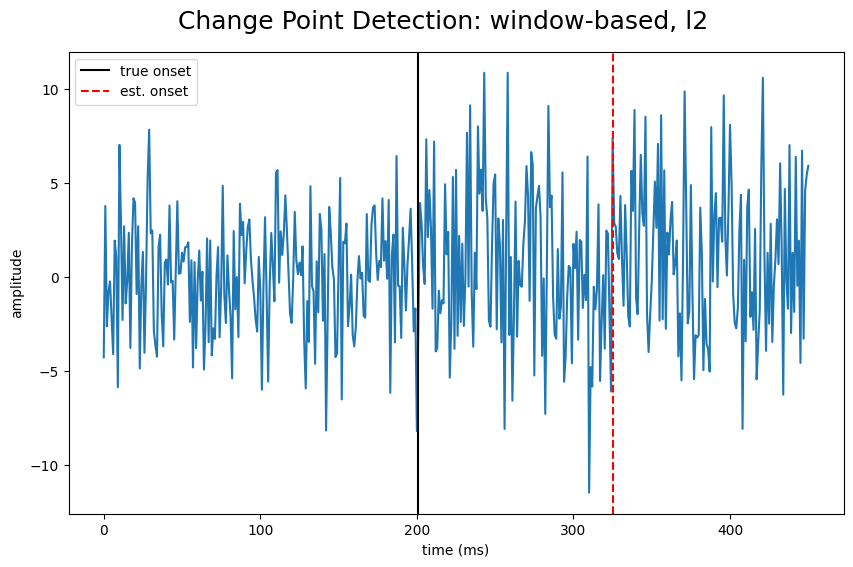

In [12]:
# Window-based search method
model = "l2"
algo = rpt.Window(width=40, model=model).fit(signal)
result = algo.predict(n_bkps=n_bkps)
est_onset = result[0]
print(est_onset)

plt.figure(figsize=(10, 6))
plt.plot(times, signal)
plt.axvline(x = true_onset, color = 'black', linestyle='-', label = 'true onset')
plt.axvline(x = est_onset, color = 'red',  linestyle='--', label = 'est. onset')
plt.suptitle('Change Point Detection: window-based, l2', y=.95, fontsize=18)
plt.xlabel("time (ms)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

170


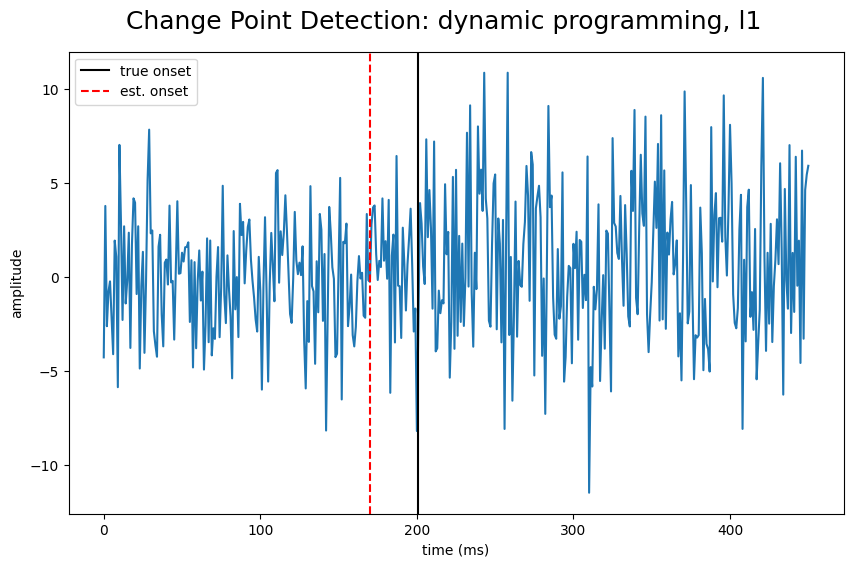

In [13]:
# Dynamic programming search method
model = "l1"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(signal)
result = algo.predict(n_bkps=n_bkps)
est_onset = result[0]

print(est_onset)

plt.figure(figsize=(10, 6))
plt.plot(times, signal)
plt.axvline(x = true_onset, color = 'black', linestyle='-', label = 'true onset')
plt.axvline(x = est_onset, color = 'red',  linestyle='--', label = 'est. onset')
plt.suptitle('Change Point Detection: dynamic programming, l1', y=.95, fontsize=18)
plt.xlabel("time (ms)")
plt.ylabel("amplitude")
plt.legend()
plt.show()